In [1]:
from datasets import load_dataset

ds = load_dataset('billingsmoore/Hopkins-bo-en', split='train')

ds[0]

{'bo': 'ཀ་འཁོར་བ་', 'en': 'beginningless cyclic existence'}

INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
/home/j/Documents/MLotsawa/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Batches:   0%|          | 0/434 [00:00<?, ?it/s]

[I 2025-02-04 15:53:34,615] A new study created in memory with name: no-name-10244fc4-1acd-4d2c-9a45-da30972e3eca
[I 2025-02-04 15:54:00,242] Trial 0 finished with value: 2.1042678269350485 and parameters: {'umap_n_neighbors': 25, 'umap_min_dist': 0.2501013257144421, 'hdbscan_min_cluster_size': 74, 'cluster_selection_epsilon': 0.8573227115952821}. Best is trial 0 with value: 2.1042678269350485.
[I 2025-02-04 15:54:18,853] Trial 1 finished with value: 2.30338041022249 and parameters: {'umap_n_neighbors': 32, 'umap_min_dist': 0.4780357224694801, 'hdbscan_min_cluster_size': 50, 'cluster_selection_epsilon': 0.33045321663489313}. Best is trial 1 with value: 2.30338041022249.
[I 2025-02-04 15:54:45,843] Trial 2 finished with value: -459.1646631954871 and parameters: {'umap_n_neighbors': 34, 'umap_min_dist': 0.2985326707388256, 'hdbscan_min_cluster_size': 15, 'cluster_selection_epsilon': 0.10114849299014761}. Best is trial 1 with value: 2.30338041022249.
[I 2025-02-04 15:55:06,786] Trial 3 fi

Using HDBSCAN params={'cluster_selection_method': 'leaf', 'min_cluster_size': 38, 'metric': 'euclidean', 'cluster_selection_epsilon': 0.8623386096677009}


AttributeError: 'NoneType' object has no attribute 'keys'

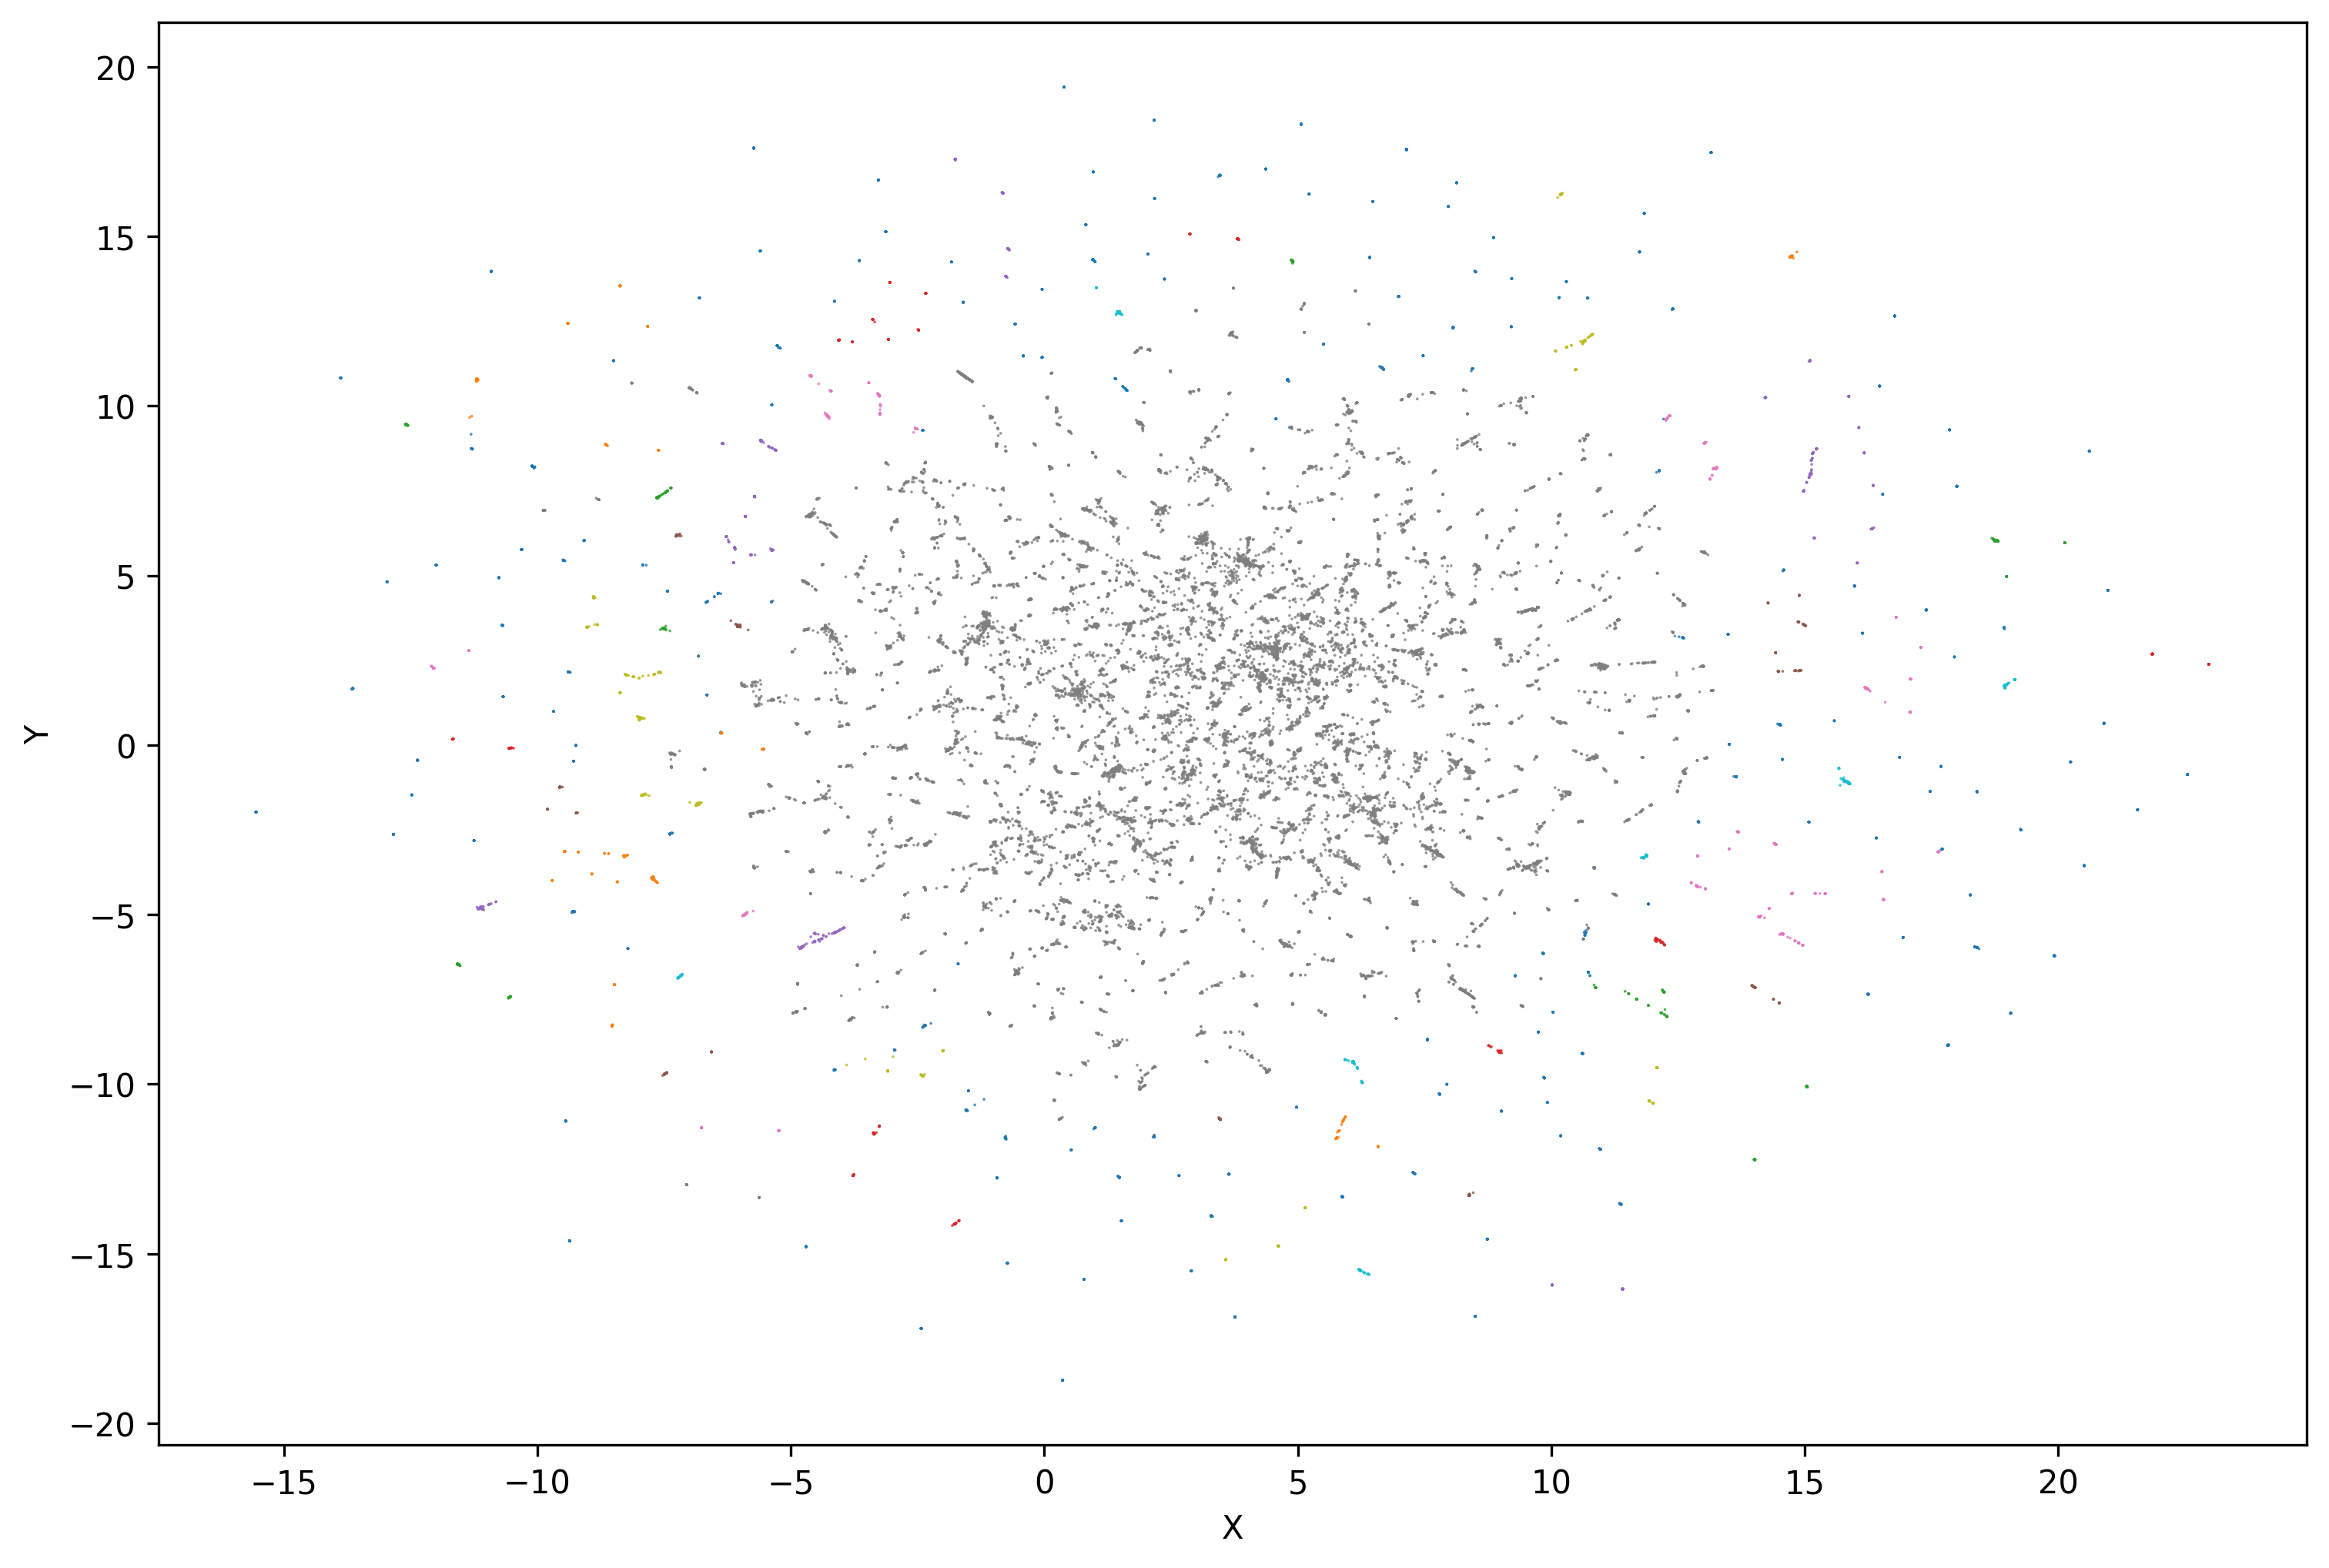

In [3]:
from easy_text_clustering.clusterer import ClusterClassifier

cc = ClusterClassifier(embed_device='cuda', summary_create=False)

cc.optimize_fit(ds['en'])

cc.show()

In [4]:
len(cc.cluster_centers)

72

In [5]:
cc.summaries = cc.summarize(cc.texts, cc.cluster_labels)

Request:
<s>[INST]Example 1:
establish

Example 2:
construct

Example 3:
establish

Example 4:
establish

Example 5:
establish

Example 6:
establish

Example 7:
establish

Example 8:
construct

Example 9:
establish

Example 10:
establish

Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 72


In [6]:
cc.cluster_summaries = cc.summaries

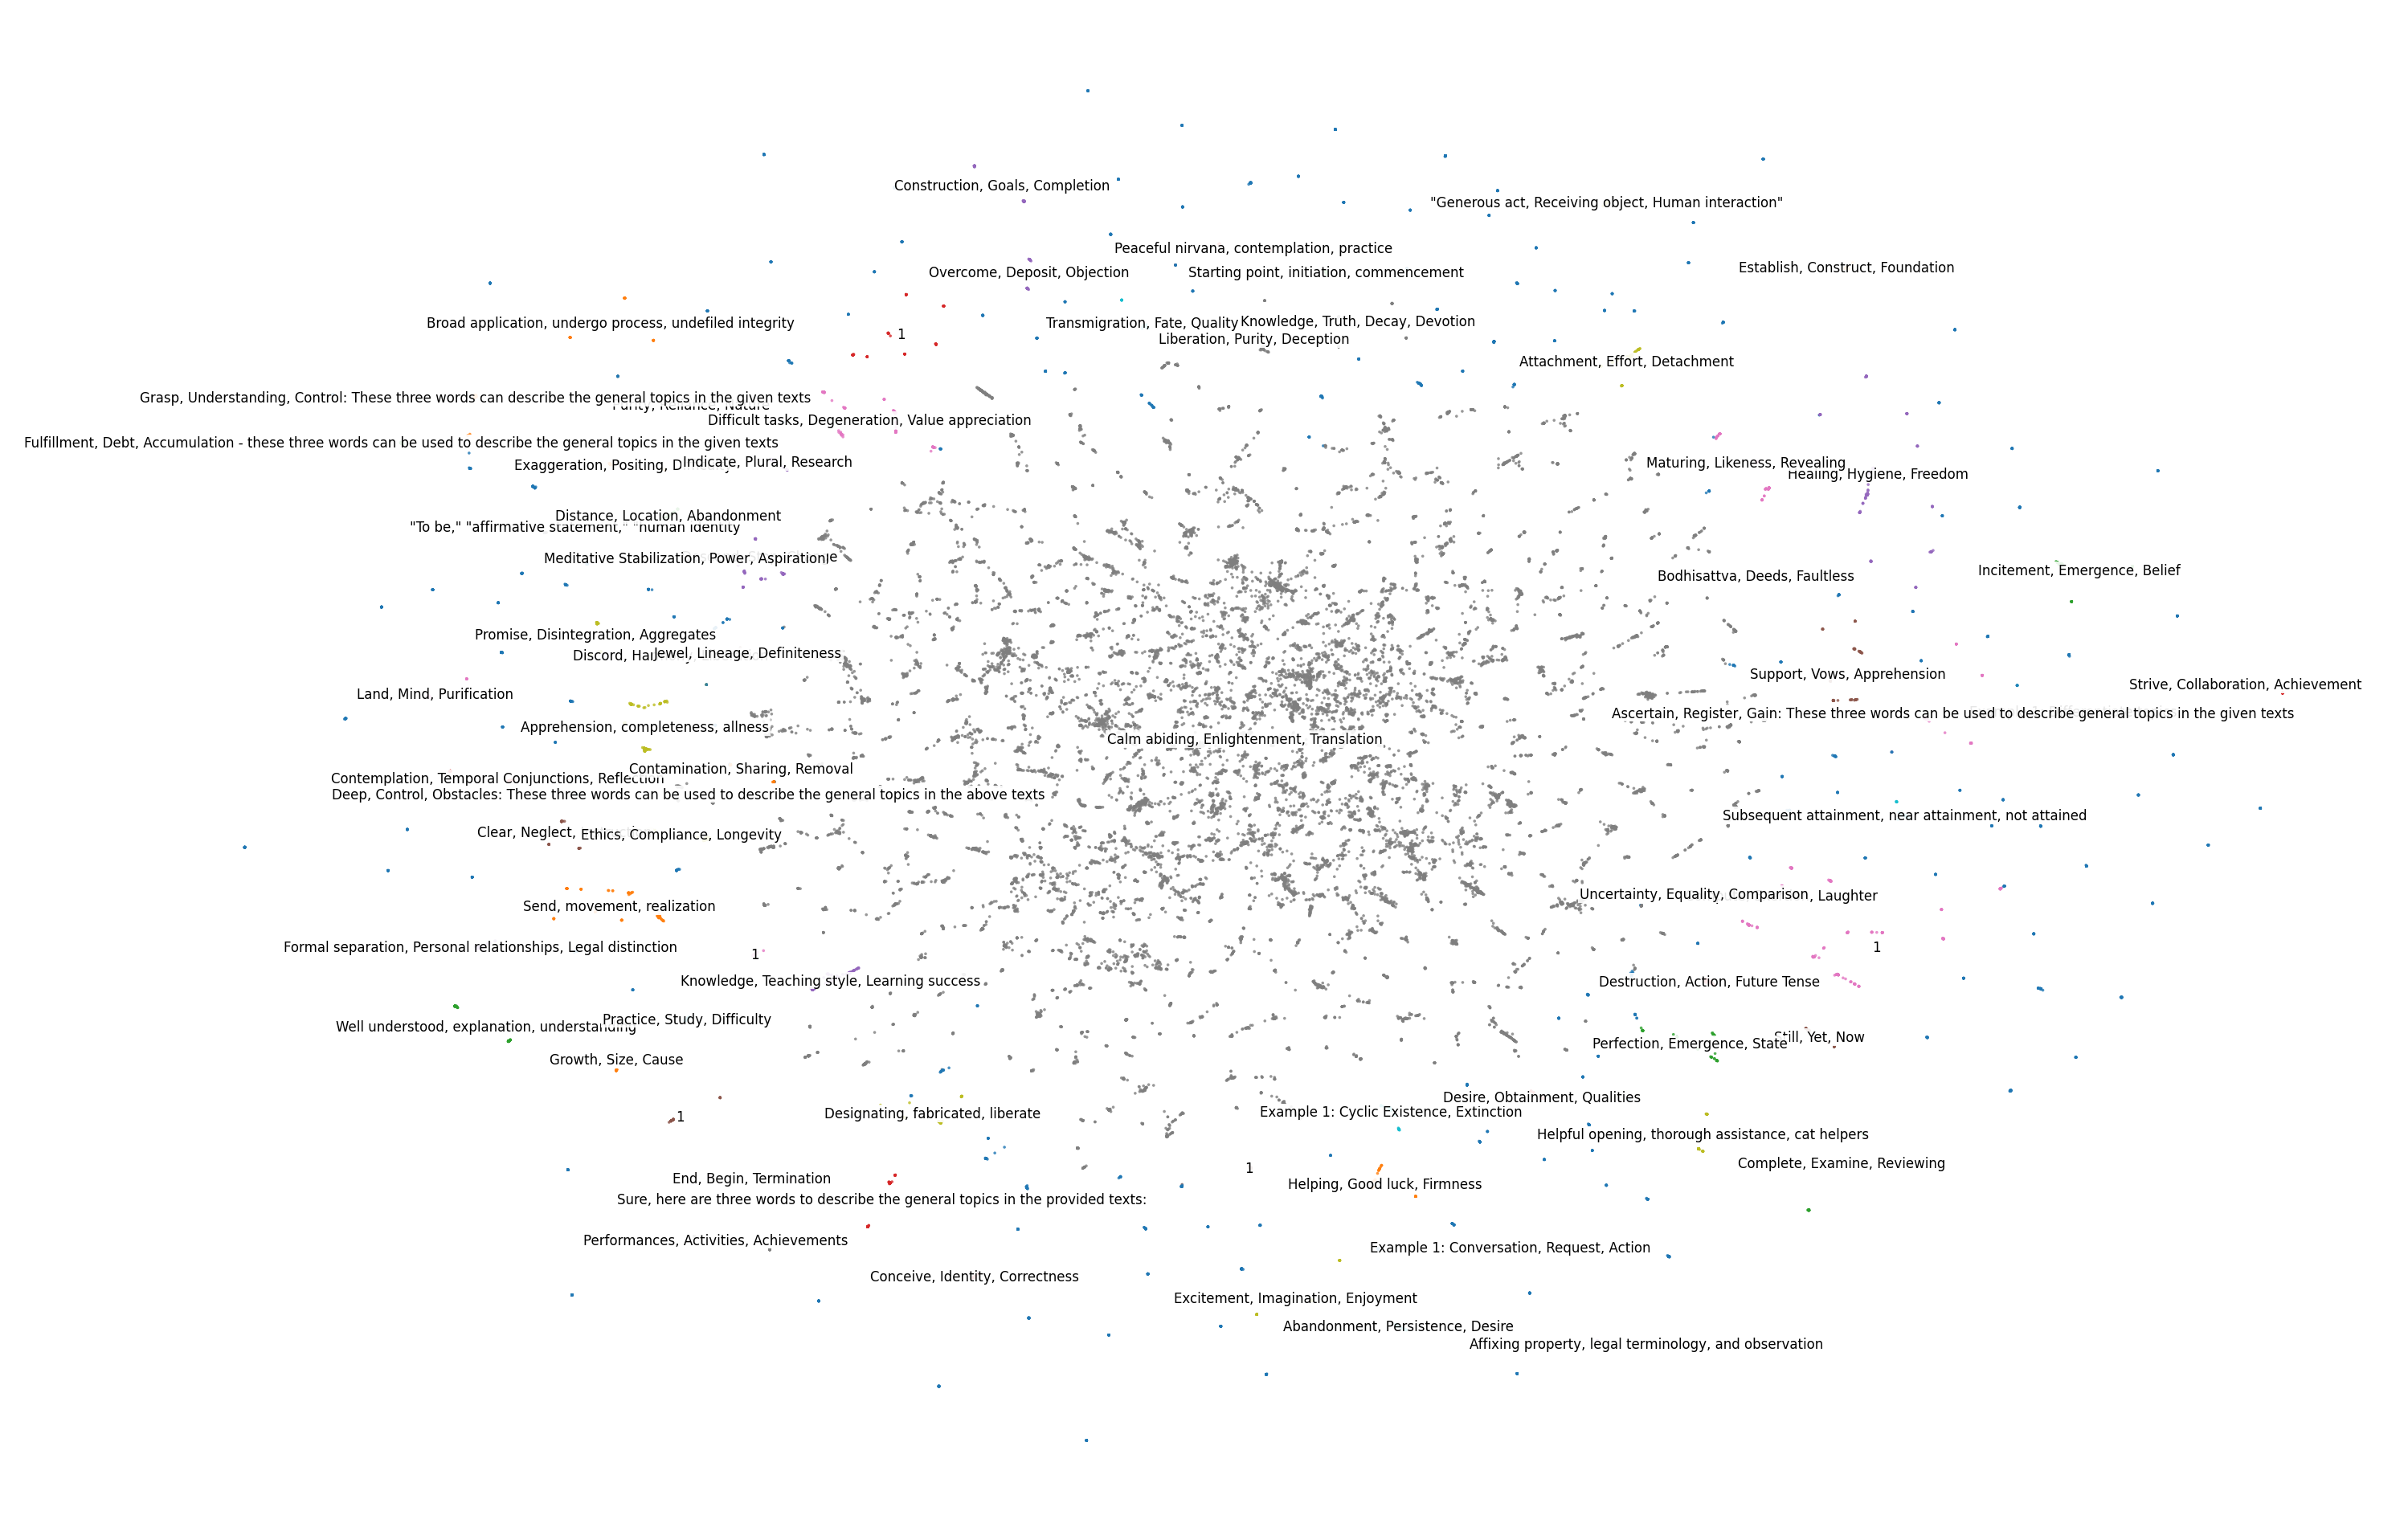

In [7]:
cc.show()

In [12]:
cc.cluster_summaries

{-1: 'None',
 0: 'Establish, Construct, Foundation',
 1: 'Complete, Examine, Reviewing',
 2: 'Strive, Collaboration, Achievement',
 3: 'Affixing property, legal terminology, and observation',
 4: '1',
 5: 'End, Begin, Termination',
 6: 'Performances, Activities, Achievements',
 7: '"Generous act, Receiving object, Human interaction"',
 8: 'Abandonment, Persistence, Desire',
 9: 'Broad application, undergo process, undefiled integrity',
 10: 'Well understood, explanation, understanding',
 11: 'Sure, here are three words to describe the general topics in the provided texts:',
 12: 'Construction, Goals, Completion',
 13: 'Still, Yet, Now',
 14: 'Land, Mind, Purification',
 15: 'Purity, Reliance, Nature',
 16: 'Helpful opening, thorough assistance, cat helpers',
 17: 'Practice, Study, Difficulty',
 18: 'Growth, Size, Cause',
 19: 'Incitement, Emergence, Belief',
 20: 'Conceive, Identity, Correctness',
 21: 'Healing, Hygiene, Freedom',
 22: '1',
 23: '1',
 24: 'Liberation, Purity, Deception

In [28]:
summaries = [cc.cluster_summaries[label] if label in cc.cluster_summaries.keys() else 'None' for label in cc.cluster_labels]

In [29]:
df = ds.to_pandas()
df.head()

,bo,en,topic
0,ཀ་འཁོར་བ་,beginningless cyclic existence,"Example 1: Cyclic Existence, Extinction"
1,ཀ་འཁོར་བ་,cycling from the beginning,"Starting point, initiation, commencement"
2,ཀ་འཁོར་བ་,"cycling from the first letter of the alphabet, ka","Calm abiding, Enlightenment, Translation"
3,ཀ་དག༏་ཀ་ནས་དག་པ་,essential purity,"Purity, Reliance, Nature"
4,ཀ་དག༏་ཀ་ནས་དག་པ་,pure from the beginning,"Calm abiding, Enlightenment, Translation"


In [30]:
df['topic'] = summaries

In [31]:
from datasets import Dataset

ds = Dataset.from_pandas(df)
ds[0]

{'bo': 'ཀ་འཁོར་བ་',
 'en': 'beginningless cyclic existence',
 'topic': 'Cyclic Existence, Extinction'}

In [32]:
ds.push_to_hub('billingsmoore/Hopkins-bo-en')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/28 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/billingsmoore/Hopkins-bo-en/commit/0b122d87a7ba5ade3777c3cc2d708aaf831de26d', commit_message='Upload dataset', commit_description='', oid='0b122d87a7ba5ade3777c3cc2d708aaf831de26d', pr_url=None, pr_revision=None, pr_num=None)